# Sheet 3: Principal Component Analysis

In this exercise sheet we look into how to compute and apply a Principal Component Analysis (PCA).

## Toy 4D Example

We start by loading our toy example. The data is stored as a Numpy array, it is a $2585\times 5$ matrix. The last component of each row is the label, the first four components are the coordinates in 4D. Each label is an integer from  $\{0, 1, 2, 3, 4\}$.

The data contains a noisy 2D plane which is embded into 4D. We would like to represent the data in its _intrinsic_ 2D form.

In [1]:
#!pip install pillow  # install the Python package "pillow"
import numpy as np
import mllab.pca
import scipy
import matplotlib.pylab as pl

In [2]:
pca_toy_4d = np.load("data/pca_toy_4d.npy")
y = pca_toy_4d[:, -1]  # labels
x = pca_toy_4d[:, :-1]  # 4D coordinates

Let us plot slices from this 4D data. We provide a helper function for this:

In [3]:
# Show documentation
mllab.pca.plot_toy_slice?

We want to remove the noise and recover the 2D information.

### Task 3.1

Write an implementation of the function below. Use a singular value decomposition (SVD), but avoid computing it completely since we only need the first $q$ eigenvectors. You can use a NumPy/SciPy function for this.

In [3]:
from scipy.sparse.linalg import svds

def pca(x, q):
    """
    Compute principal components and the coordinates.
    
    Parameters
    ----------
    
    x: (n, d) NumPy array
    q: int
       The number of principal components to compute.
       Has to be less than `p`.

    Returns
    -------
    
    Vq: (d, q) NumPy array, orthonormal vectors (column-wise)
    xq: (n, q) NumPy array, coordinates for x (row-wise)
    """
    size = len(x[0])
    X = x - np.mean(x,axis=0)
    a,b = scipy.linalg.eigh((X.T)@X,eigvals=(size-q,size-1))
    Vq = scipy.linalg.orth(b)
    xq = np.transpose(b.T@X.T)
    
    return(Vq,xq)

Now we can compute the 2D dimensional representation of `x` using PCA.

In [4]:
V, xq = pca(x, q=2)

### Task 3.2 a

And then plot the coordinates `xq`, which are two dimensional. We provide a helper function for this task. Let us check how to use it:

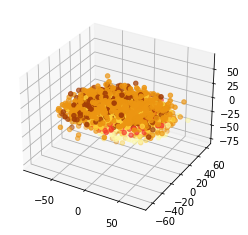

In [5]:
mllab.pca.plot_toy_slice(x,y,1)

In [64]:
mllab.pca.plot_toy_2d?

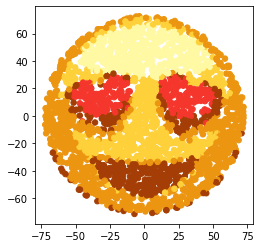

In [6]:
plot = mllab.pca.plot_toy_2d(xq,y)

Hopefully you appreciate the result.

### Task 3.2 b

Let us see how PCA handles a non-linear transformation. To test this we map our data into 3D by keeping the y-axis as the new z-axis and bending x-coordinate onto an ellipse.

In [128]:
mllab.pca.map_on_ellipse?

Signature: mllab.pca.map_on_ellipse(xq, a=4, b=1, gap_angle=90)
Docstring:
Map 2D points on bend ellipse in 3D.

Parameters
----------

xq: (n, 2) array-like
    The 2D points
a, b: non-negative, scalar
    Ellipsis axis
gap_angle: scalar in [0,360)
    Degree of the gap the bend ellipse should have.
    E.g. for 0 the data is mapped onto a closed ellipse.

Returns
-------

xyz: (n, 3) array-like
    Mapped 3D points
File:      c:\users\user\desktop\mllab-exercise-3-mieszko-and-joel-master\mllab\pca\__init__.py
Type:      function


In [7]:
xyz = mllab.pca.map_on_ellipse(xq, a=4, b=1, gap_angle=270)

<IPython.core.display.Javascript object>


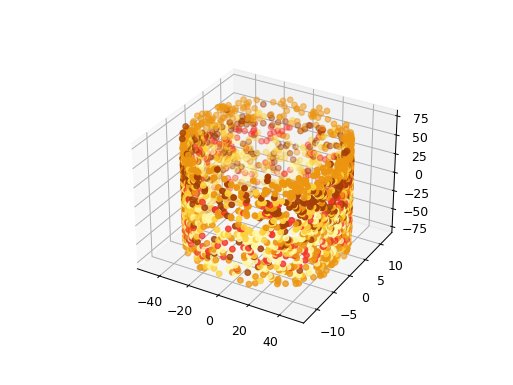

In [8]:
%matplotlib notebook
mllab.pca.plot_toy_3d(xyz, y)

**(Remeber to stop the interactive plot by pressing the shutdown icon!)**

Now apply PCA to our transformed data and plot the result as before.

In [9]:
V, xyzq = pca(xyz, q=2)

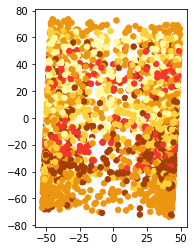

In [10]:
labels = np.round(4*xyz[...,-1]/max(xyz[...,-1]))
%matplotlib inline
plot = mllab.pca.plot_toy_2d(xyzq,y)

Could be worse, but undeniably discomforting. Try different axes lengths and gap sizes of the ellipse. What do you observe?

### Task 3.3 a

We want to see if PCA can improve the accuracy of separating hyperlanes. First compute the singular values of the Iris dataset, then check how many percent of the variance the first two principal components capture.

In [133]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x = iris['data']
iris_y = iris['target']

In [134]:
X = iris_x - np.mean(iris_x,axis=0)
singular_values = np.linalg.eigvals(X.T@X/len(X))

In [135]:
print("Percentage of variance when considering the first singular value: ",100*singular_values[0]/np.sum(singular_values))
print("Percentage of variance when considering the first two singular values:",100*np.sum(singular_values[:2])/np.sum(singular_values))

Percentage of variance when considering the first singular value:  92.46187232017269
Percentage of variance when considering the first two singular values: 97.76852063187948


### Task 3.3 b

Now apply PCA and compute the first two principal components. Plot the projected 2D data in a scatter plot such that the three labels are recognizable. What do you observe?

In [136]:
import matplotlib.pyplot as plt

In [137]:
V, xq = pca(iris_x, q=2)

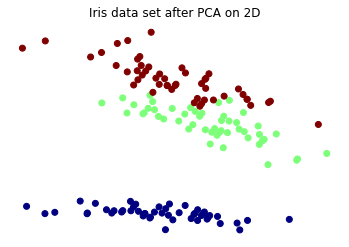

In [144]:
colors = pl.cm.jet(np.linspace(0,1,3))
plt.scatter(xq[:,0],xq[:,1],c = colors[iris_y])
plt.axis('off')
plt.title('Iris data set after PCA on 2D')
plt.show()

In [ ]:
def plot_1d_iris(a, b, c):
    """Show a 1D plot of three 1D datasets a, b and c.
    
    Top to bottom plotted in order is a, b, c."""
    left = min(x.min() for x in (a, b, c))
    right = max(x.max() for x in (a, b, c))
    for i, (x, c) in enumerate(((a, 'red'), (b, 'blue'), (c, 'green'))):
        plt.hlines(i * .3, left, right, linestyles='dotted', colors=[(.8,.8,.8,1)])
        plt.eventplot(x, colors=c, linewidths=1, linelengths=1, lineoffsets=(2 - i) * .3)
    plt.axis('off')


In [ ]:
V, xq1 = pca(iris_x, q=1)

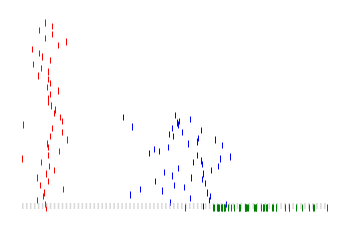

In [ ]:
plot_1d_iris(xq1[iris_y==0],xq1[iris_y==1],xq1[iris_y==2])

For PCA algorithm we distinguish between iris classes in a linear way unlike to the methods we used before.

### Task 3.3 c

Finally, recompute the accurancy as in sheet 1 and compare the results.

In [ ]:
from numpy.linalg import lstsq
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

def labels(x1, x2):
    return np.concatenate((np.zeros(x1.shape[0], dtype='int'), np.ones(x2.shape[0], dtype='int')))

def classifier(xq,labels0,labels2):
    '''
    Defining a classifier. First we distinguish iris with label 2, then those with label 0 and the remaining should have label 1
    '''
    clf2 = LinearSVC(random_state=0, tol=1e-5)
    clf2.fit(xq, labels2)

    clf0 = LinearSVC(random_state=0, tol=1e-5)
    clf0.fit(xq, labels0)

    y_pred = np.ones_like(iris_y) - clf0.predict(xq) 
    y_pred += np.multiply(clf2.predict(xq),y_pred != 0)
    
    return y_pred

In [ ]:
labels2 = np.array(iris_y==2,dtype='int')
labels0 = np.array(iris_y==0,dtype='int')

for q in [4,2,1]:

    V, xq = pca(iris_x, q=q)
    
    y_pred = classifier(xq,labels0,labels2)
    
    print("The accuracy of the classifier using ",q,"principal components is ",accuracy_score(iris_y,y_pred))

The accuracy of the classifier using  4 principal components is  0.9866666666666667
The accuracy of the classifier using  2 principal components is  0.9733333333333334
The accuracy of the classifier using  1 principal components is  0.9333333333333333


## Pedestrian Classification

### Task 3.4 a

__Read the pedestrian dataset into a NumPy array and normalize to [0,1]__

In [ ]:
import mllab.pca
mllab.pca.load_pedestrian_images?

In [ ]:
#Load the images and normalize them
X_train = np.concatenate([mllab.pca.load_pedestrian_images("train",True),mllab.pca.load_pedestrian_images("train",False)],axis=0)/255
X_test = np.concatenate([mllab.pca.load_pedestrian_images("test",True),mllab.pca.load_pedestrian_images("test",False)],axis=0)/255


### Task 3.4 b

__Write a function to plot an image__

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_im(im, ax=None, title=None, max_contrast=False):
    """
    Plot a normalized image.
    
    Parameters
    ----------
    
    im: (1250,) array-like
    """
    plt.imshow(im,vmin=np.amin(im),vmax=np.amax(im))
    #plt.show()

__Plot 10 randomly chosen images showing a pedestrian, and 10 randomly chosen images not showing a pedestrain.__

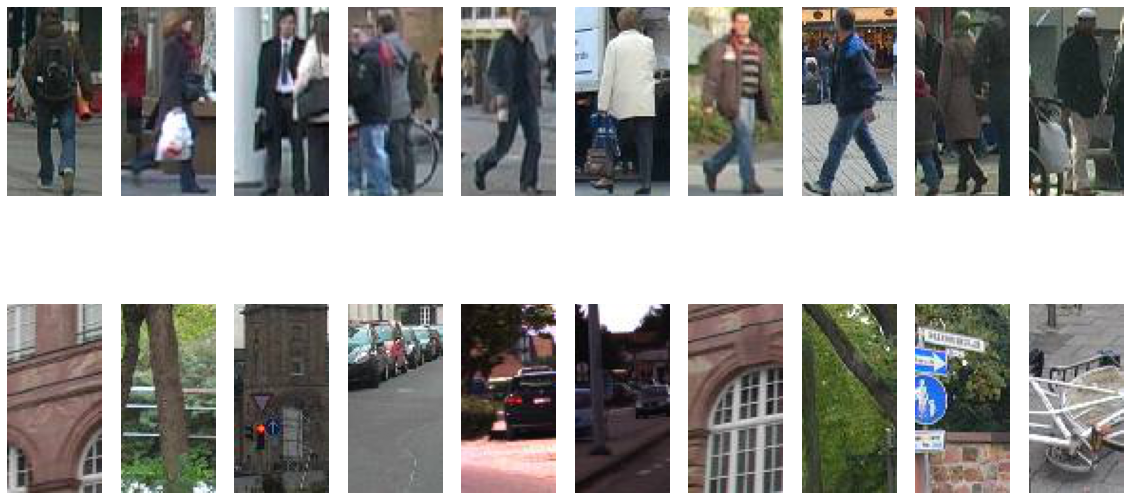

In [ ]:
fig,axs = plt.subplots(nrows = 2, ncols = 10,figsize=(20,10))

for i in range(10):
    entry = np.random.choice(1000)
    axs[0,i].imshow(X_train[entry])
    axs[0,i].axis("off")
    
for i in range(10):
    entry = np.random.choice(np.arange(1001,2001,1))
    axs[1,i].imshow(X_train[entry])
    axs[1,i].axis("off")
    
plt.axis("off")
plt.show()

### Task 3.5 a

__Compute the PCA of the full training set for $q=200$__

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components = 200)
pca.fit(np.reshape(X_train,(2000,15000)))

PCA(n_components=200)

### Task 3.5 b

__Plot the eigenpedestrian 1-20, 51-60, and 111-120__

In [ ]:
eigenpedestrians = pca.components_
eigenpedestrians = np.reshape(eigenpedestrians,(200,100,50,3))

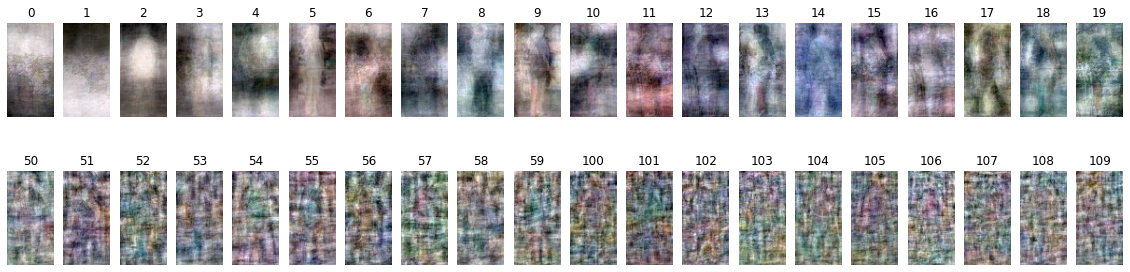

In [ ]:
fig,axs = plt.subplots(nrows = 2, ncols = 20,figsize=(20,5))

for i in range(20):
    im = eigenpedestrians[i]
    im = im - np.amin(im)
    im = im/np.amax(im)
    axs[0,i].imshow(im)
    axs[0,i].axis("off")
    axs[0,i].set_title(str(i))
    
for i in range(10):
    im = eigenpedestrians[50+i]
    im = im - np.amin(im)
    im = im/np.amax(im)
    axs[1,i].imshow(im)
    axs[1,i].axis("off")
    axs[1,i].set_title(str(50+i))
    
for i in range(10):
    im = eigenpedestrians[100+i]
    im = im - np.amin(im)
    im = im/np.amax(im)
    axs[1,10+i].imshow(im)
    axs[1,10+i].axis("off")
    axs[1,10+i].set_title(str(100+i))

 The bigger the eigenvalues gets the better is the posture recognizable. The smalller the eigenvalues are the more random data they include.

### Task 3.6

__Compute the scores for a linear SVM using increasing numbers of principal components__

Use 10 to 200 components in steps of 5. Train the linear SVM with $C=0.01$ and increse the maximum number of iterations for the solver. You can reuse the computed PCA from above.

In [ ]:
from sklearn.svm import LinearSVC

flat_train = np.reshape(X_train,(2000,15000))
flat_test = np.reshape(X_test,(1000,15000))

labels_train = np.concatenate((np.ones(1000),np.zeros(1000)))
labels_test = np.concatenate((np.ones(500),np.zeros(500)))

ac_train,ac_test = [],[]

for q in range(10,201):
    pca = PCA(n_components = q)
    pca.fit(flat_train)
    
    Vq = pca.components_
    projections = Vq@flat_train.T
    
    clf = LinearSVC(random_state=0, tol=1e-5)
    clf.fit(projections.T, labels_train)
    
    x1 = Vq@flat_train.T
    x2 = Vq@flat_test.T
    
    y_pred_train = clf.predict(x1.T)
    y_pred_test = clf.predict(x2.T)
    
    ac_train.append(accuracy_score(labels_train,y_pred_train))
    ac_test.append(accuracy_score(labels_test,y_pred_test))

Plot the training and test scores over $q$.

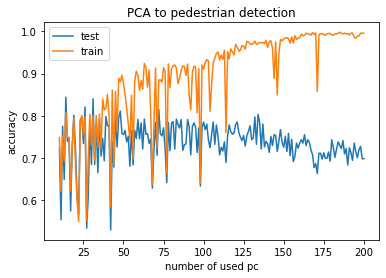

In [ ]:
plt.plot(np.arange(10,201,1),ac_test,label='test')
plt.plot(np.arange(10,201,1),ac_train,label='train')
plt.title('PCA to pedestrian detection')
plt.legend()
plt.xlabel('number of used pc')
plt.ylabel('accuracy')
plt.show()

For the q value between 75 and 125 we get the most optimal results for test data. That means the greatest accuracy and the smallest variance. For the smaller q's we see some variance issues (lack of data) and for the bigger q's the accuracy decreases (overfitting).  

### Task 3.7

## HOG Features

We decided to provide the implementation of the HOG features. (Task 3.7 a). 
Bonus Task (only 3.7 b): Compute the HOG features of the test data. Then apply PCA and calculate the scores

In [ ]:
import numpy as np
import scipy.ndimage as ndimage
from numpy.linalg import norm
from scipy.ndimage.filters import convolve


class HogFeatures:
    def __init__(self, im_shape, n_bins=9, cell_size=8, blk_size=2, unsigned=True, clip_val=.2):
        self.deg_range = np.pi if unsigned else 2 * np.pi
        self.n_bins = n_bins
        self.bins = np.linspace(0, self.deg_range, n_bins, endpoint=False)
        self.bin_size = self.deg_range / n_bins
        self.cell_size = cell_size
        self.blk_size = blk_size
        self.clip_val = clip_val

        self.im_h, self.im_w = im_shape
        x, y = np.arange(self.im_w), np.arange(self.im_h)
        
        # Compute logical cell indices of next lower and upper cell
        # w.r.t. to the cell center
        cells_x = np.arange(-cell_size, self.im_w - (cell_size + 1)/2, cell_size)
        self.n_cells_x = len(cells_x) - (2 if cells_x[-1] >= self.im_w else 1)
        x0 = np.digitize(x, cells_x + cell_size / 2) - 2
        Xc = ((x0 + 1) - .5) * cell_size - .5
        f_x = (x - Xc) / cell_size

        cells_y = np.arange(-cell_size, self.im_h - (cell_size + 1)/2, cell_size)
        self.n_cells_y = len(cells_y) - (2 if cells_y[-1] >= self.im_h else 1)
        y0 = np.digitize(y, cells_y + cell_size / 2) - 2
        Yc = ((y0 + 1) - .5) * cell_size - .5
        f_y = (y - Yc) / cell_size
        
        self.f_x, self.f_y = np.meshgrid(f_x, f_y)
    
    def extract(self, im):
        """
        Extract the HOG features for a image.
        
        Parameters
        ----------
        
        im: ndarray
            An array of shape (height, width, 3).
        """
        im = np.rollaxis(im.reshape(self.im_h, self.im_w, -1), 2)
        dx = convolve(im, [[[1,0,-1]]], mode='constant')
        dy = convolve(im, [[[-1],[0],[1]]], mode='constant')
        grads_mag = norm(np.stack((dx, dy), axis=-1), axis=3)
        max_grads = np.argmax(np.rollaxis(grads_mag, 0, 3), 2)
        Y, X = np.ogrid[:grads_mag.shape[1], :grads_mag.shape[2]]
        grads_dir = np.arctan2(dy[max_grads, Y, X], dx[max_grads, Y, X]) % self.deg_range
        grads_mag = grads_mag[max_grads, Y, X]
        del dx, dy, max_grads, Y, X
        
        # Compute logical bin indices of next lower (<=) and upper bin (>)
        # w.r.t. to the bin center
        bin0 = np.digitize(grads_dir, self.bins + .5 * self.bin_size) - 1
        bin1 = bin0 + 1
        dirc = (bin0 + .5) * self.bin_size
        f_b = (grads_dir - dirc) / self.bin_size
        del grads_dir
        
        bin0 %= self.n_bins
        bin1 %= self.n_bins
        
        f_x, f_y = self.f_x, self.f_y

        hist = np.zeros((self.n_cells_y, self.n_cells_x, self.n_bins))
        bin_labels = np.arange(self.n_bins)
        # Iterate over all cells
        for ci_x in range(self.n_cells_x):
            x_pos = (ci_x * self.cell_size - (self.cell_size + 1) // 2, ci_x * self.cell_size + (self.cell_size + 1) // 2)
            x_pre = slice(max(0, x_pos[0] + self.cell_size), max(0, x_pos[1] + self.cell_size))
            x_pos = slice(max(0, x_pos[0]), x_pos[1])
            for ci_y in range(self.n_cells_y):
                y_pos = (ci_y * self.cell_size - (self.cell_size + 1) // 2, ci_y * self.cell_size + (self.cell_size + 1) // 2)
                y_pre = slice(max(0, y_pos[0] + self.cell_size), max(0, y_pos[1] + self.cell_size))
                y_pos = slice(max(0, y_pos[0]), y_pos[1])
                # Consider all four sourinding cells
                    
                # y-pre x-pre
                m = (y_pre, x_pre)
                g = grads_mag[m] * (1 - f_x[m]) * (1 - f_y[m])
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pos x-pre
                m = (y_pos, x_pre)
                g = grads_mag[m] * (1 - f_x[m]) * f_y[m]
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pre x-pos
                m = (y_pre, x_pos)
                g = grads_mag[m] * f_x[m] * (1 - f_y[m])
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pos x-pos
                m = (y_pos, x_pos)
                g = grads_mag[m] * f_x[m] * f_y[m]
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
        
        n_blks_x = self.n_cells_x + 1 - self.blk_size
        n_blks_y = self.n_cells_y + 1 - self.blk_size
        features = np.zeros((n_blks_x, n_blks_y, self.blk_size ** 2 * self.n_bins))
        for bi_x in range(n_blks_x):
            for bi_y in range(n_blks_y):
                blk = hist[bi_y:bi_y+self.blk_size, bi_x:bi_x+self.blk_size].copy()
                blk_norm = norm(blk.flatten())
                if blk_norm > 0:
                    blk /= blk_norm
                np.clip(blk, None, self.clip_val, out=blk)
                blk_norm = norm(blk.flatten())
                if blk_norm > 0:
                    blk /= blk_norm
                features[bi_x, bi_y] = blk.ravel()
        return features.flatten()


To test you Python implementation we provide some intermediate steps. The array `image` is the input, and `steps` contains the values of the inner variables of the HOG algorithm. The image is grayscale.

In [ ]:
image, steps = mllab.pca.hog_test_data()

Number of bins: 9
Cell size: 8
Block size: 2
Unsigned directions: True
Clip value: 0.2


In [ ]:
# Use Python implementation
hog = HogFeatures((100, 50))
print("Use Python implementation")


Use Python implementation


### Task 3.7 b 
__Compute the HOG features for the training data, then compute the PCA for $q=200$.__

In [ ]:
#! pip install tqdm
from tqdm import tqdm
hog_train_features = []
for i in tqdm(range(int(X_train.shape[0]))):
    im = X_train[i]
    hog_train_features.append(hog.extract(im))
print("Computed HoG.")

q = 200
hog_train_features = np.array(hog_train_features)
hog_train_pca = PCA(n_components=q)
hog_train_pca.fit(hog_train_features)

100%|███████████████████████████████████████| 2000/2000 [00:45<00:00, 43.59it/s]


Computed HoG.


PCA(n_components=200)

__Compute and plot the scores as above, but this time use the HOG features.__

In [ ]:
# compute hog features of test data
hog_test_features = []
for i in tqdm(range(int(X_test.shape[0]))):
    im = X_test[i]
    hog_test_features.append(hog.extract(im))
print("Computed HoG.")

hog_test_features = np.array(hog_test_features)

# compute scores


100%|███████████████████████████████████████| 1000/1000 [00:23<00:00, 43.03it/s]


Computed HoG.


In [ ]:
labels_train = np.concatenate((np.ones(1000),np.zeros(1000)))
labels_test = np.concatenate((np.ones(500),np.zeros(500)))

hog_ac_train,hog_ac_test = [],[]

for q in tqdm(np.arange(10,201,5)):
    pca = PCA(n_components = q)
    pca.fit(hog_train_features)
    
    Vq = pca.components_
    projections = Vq@hog_train_features.T
    
    clf = LinearSVC(random_state=0, tol=1e-5)
    clf.fit(projections.T, labels_train)
    
    x1 = Vq@hog_train_features.T
    x2 = Vq@hog_test_features.T
    
    y_pred_train = clf.predict(x1.T)
    y_pred_test = clf.predict(x2.T)
    
    hog_ac_train.append(accuracy_score(labels_train,y_pred_train))
    hog_ac_test.append(accuracy_score(labels_test,y_pred_test))

100%|███████████████████████████████████████████| 39/39 [00:12<00:00,  3.17it/s]


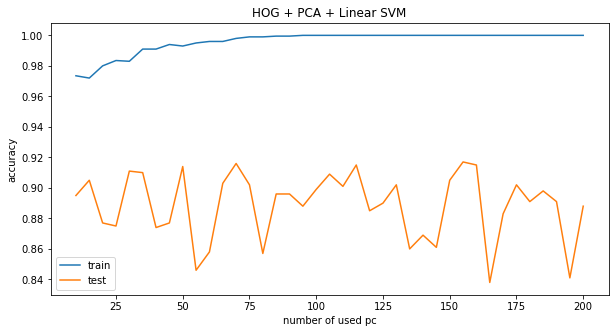

In [ ]:
plt.figure(figsize=(10,5))
plt.title("HOG + PCA + Linear SVM")
# plot the training and testing scores
plt.plot(np.arange(10,201,5),hog_ac_train,label='train')
plt.plot(np.arange(10,201,5),hog_ac_test,label='test')
plt.xlabel('number of used pc'); plt.ylabel('accuracy');plt.legend()
plt.show()